In [1]:
import torch
from dataset import CcmDataset
import matplotlib.pyplot as plt
from model import Model
from tqdm.notebook import tqdm
from utils import train_one_epoch, validation
torch.manual_seed(42)
import copy

In [2]:
#import training data
train_data = CcmDataset("data/train.pkl")
validation_data = CcmDataset("data/validation.pkl")

#create torch data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=8, shuffle=False)

In [3]:
#define model
model = Model(num_rep=8, num_hidden=15) #8 and 15 are the same values that we used in homework. These can be changed as an ablation 
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
num_epochs = 10
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.1, verbose=True)

In [4]:
#train model
train_loss = []
validation_loss = []
model_state_dicts = [] #weights for comparison
for i in range(num_epochs):
    loss = train_one_epoch(model, criterion, optimizer, device, train_loader)
    train_loss.append(loss)
    print(f" Training Loss after epoch {i} : {loss}")
    loss = validation(model, criterion, device, validation_loader)
    validation_loss.append(loss)
    model_state_dicts.append(copy.deepcopy(model.state_dict()))
    print(f" Validation Loss after epoch {i} : {loss}")
    #scheduler.step()

0it [00:00, ?it/s]

 Training Loss after epoch 0 : 0.9119083024561405
 Validation Loss after epoch 0 : 0.8977941473325094


0it [00:00, ?it/s]

 Training Loss after epoch 1 : 0.8827112160623074
 Validation Loss after epoch 1 : 0.8689691887961494


0it [00:00, ?it/s]

 Training Loss after epoch 2 : 0.8523780133575201
 Validation Loss after epoch 2 : 0.8387998077604506


0it [00:00, ?it/s]

 Training Loss after epoch 3 : 0.8211447801440954
 Validation Loss after epoch 3 : 0.806632916132609


0it [00:00, ?it/s]

 Training Loss after epoch 4 : 0.7915893714874983
 Validation Loss after epoch 4 : 0.7764832774798075


0it [00:00, ?it/s]

 Training Loss after epoch 5 : 0.7659612789750099
 Validation Loss after epoch 5 : 0.7546255985895792


0it [00:00, ?it/s]

 Training Loss after epoch 6 : 0.7465717483311891
 Validation Loss after epoch 6 : 0.7376584675576952


0it [00:00, ?it/s]

 Training Loss after epoch 7 : 0.7324433419853449
 Validation Loss after epoch 7 : 0.7254772981007894


0it [00:00, ?it/s]

 Training Loss after epoch 8 : 0.7228588499128819
 Validation Loss after epoch 8 : 0.7168623606363932


0it [00:00, ?it/s]

 Training Loss after epoch 9 : 0.7159986697137356
 Validation Loss after epoch 9 : 0.7108205027050443


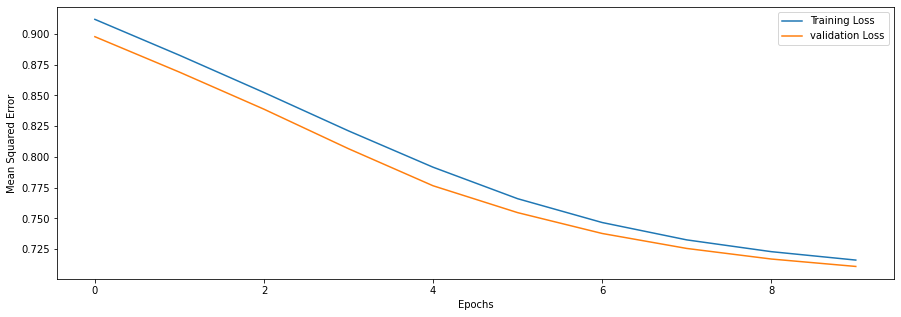

In [5]:
#plot loss curve
plt.figure(figsize=(15,5))
plt.plot(list(range(num_epochs)), train_loss, label = "Training Loss")
plt.plot(list(range(num_epochs)), validation_loss, label = "validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [7]:
#save models for testing
torch.save(model_state_dicts[::2], "models/model.pt")